In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Zoo.csv')

In [3]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
data['animal name'].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [7]:
#check if there are duplicates in animal_name
duplicates = data['animal name'].value_counts()
duplicates[duplicates > 1]

animal name
frog    2
Name: count, dtype: int64

In [8]:
frog = data[data['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [9]:
# observation: find that one frog is venomous and another one is not 
# change the venomous one into frog2 to seperate 2 kinds of frog 
data['animal name'][(data['venomous'] == 1 )& (data['animal name'] == 'frog')] = "frog2"

In [10]:
data['venomous'].value_counts()

venomous
0    93
1     8
Name: count, dtype: int64

In [12]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in data.hair]
unique_color = list(set(color_list))
unique_color

['red', 'blue']

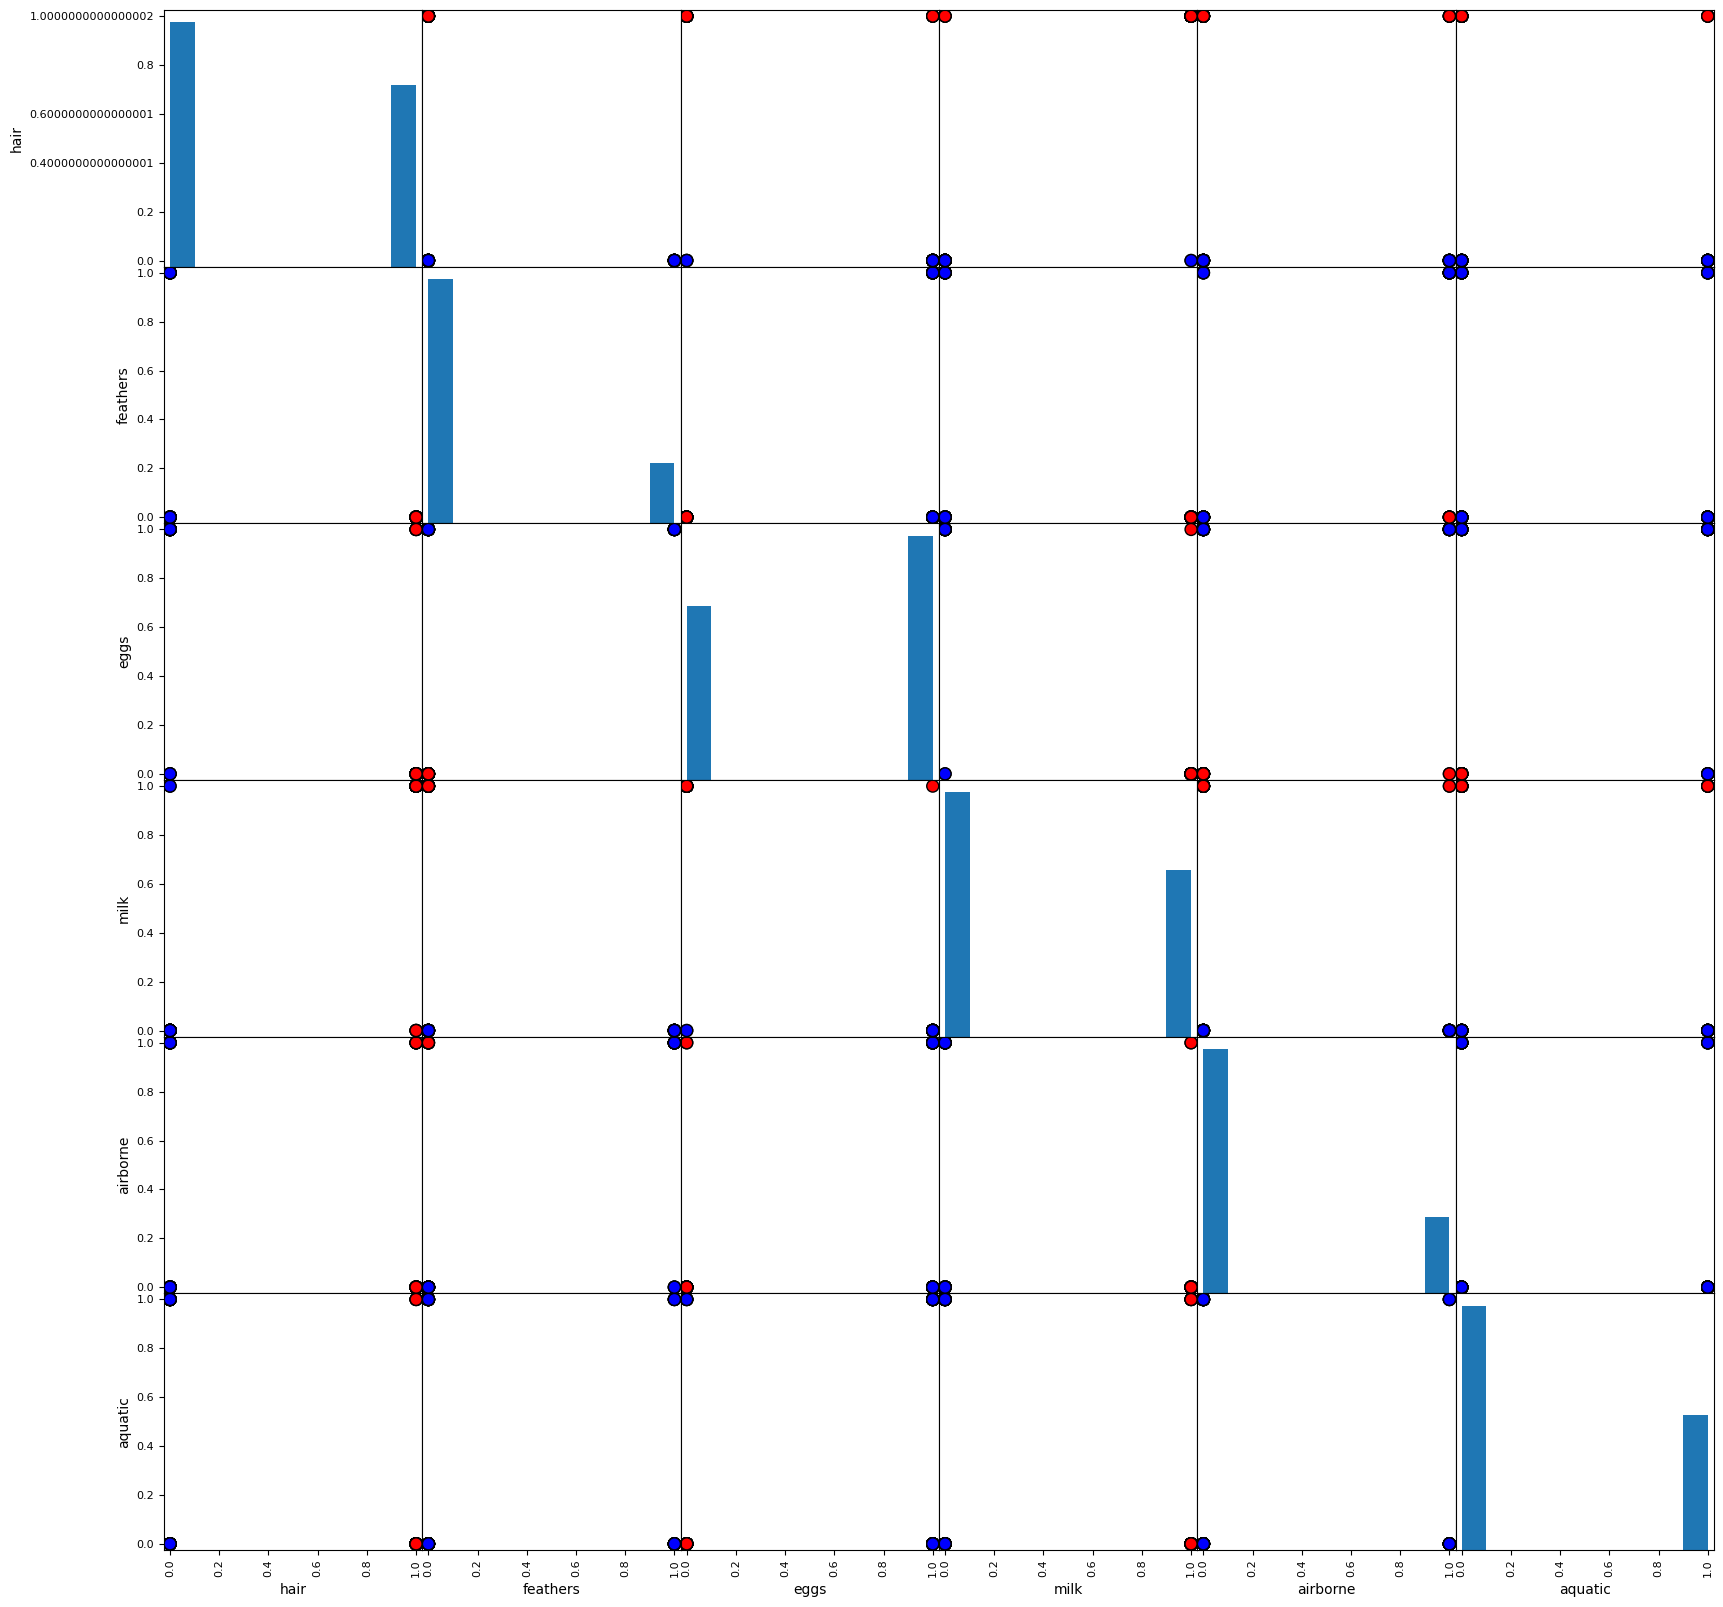

In [14]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(data.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

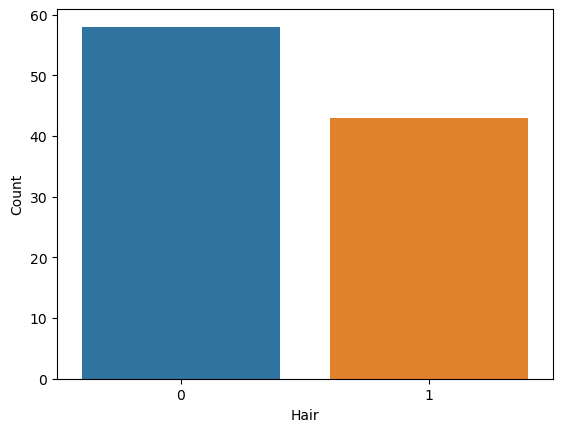

hair
0    58
1    43
Name: count, dtype: int64

In [15]:
sns.countplot(x="hair", data=data)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
data.loc[:,'hair'].value_counts()

[]

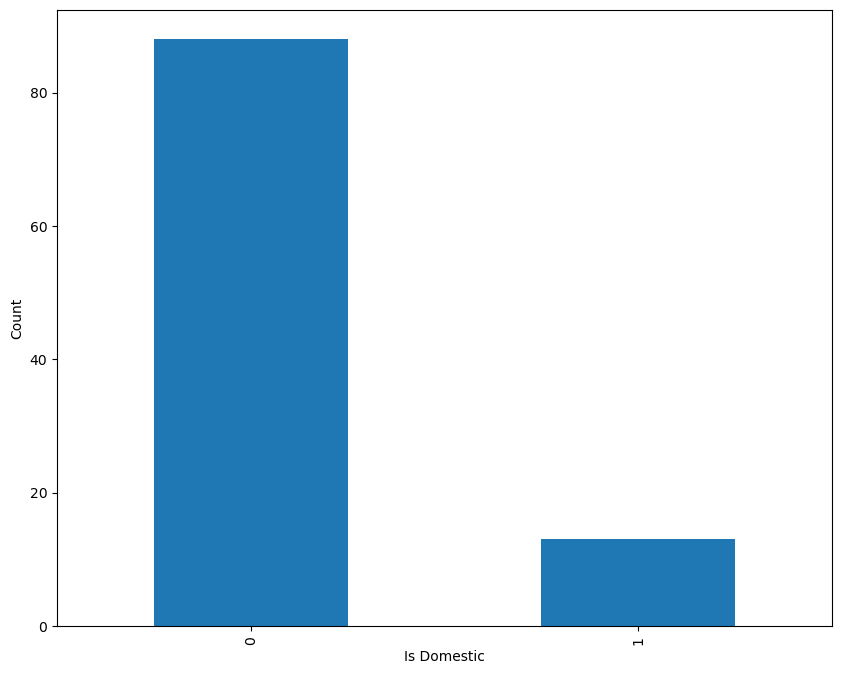

In [16]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
data['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

##### So we can see mostly animals are not domestic.

In [18]:
pd.crosstab(data['type'], data['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


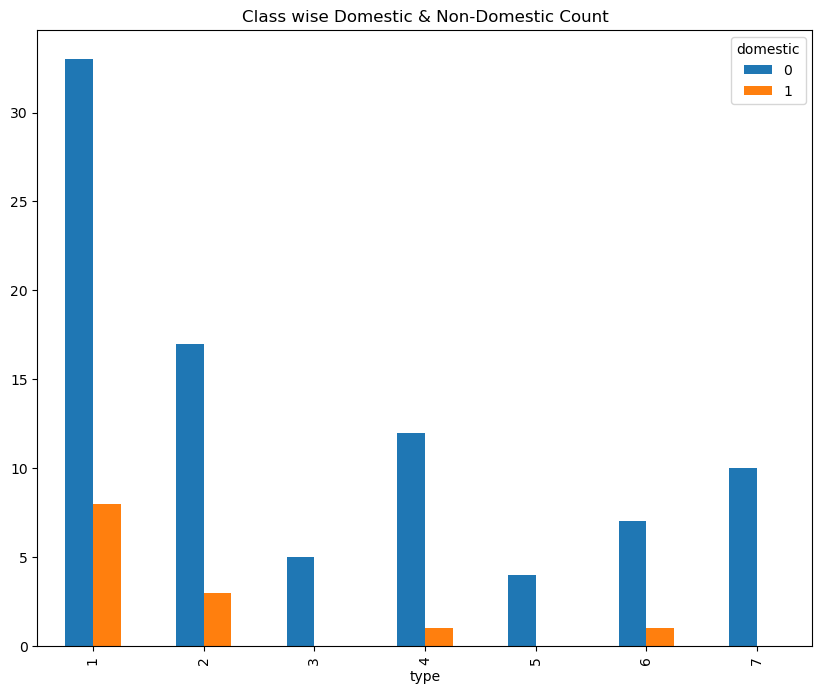

In [19]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(data['type'], data['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [20]:
# Lets see how many animals provides us milk
data['milk'].value_counts()

milk
0    60
1    41
Name: count, dtype: int64

##### So there are 41 animals in the list which provides us milk. Lets see to which category they belongs

In [21]:
pd.crosstab(data['type'], data['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


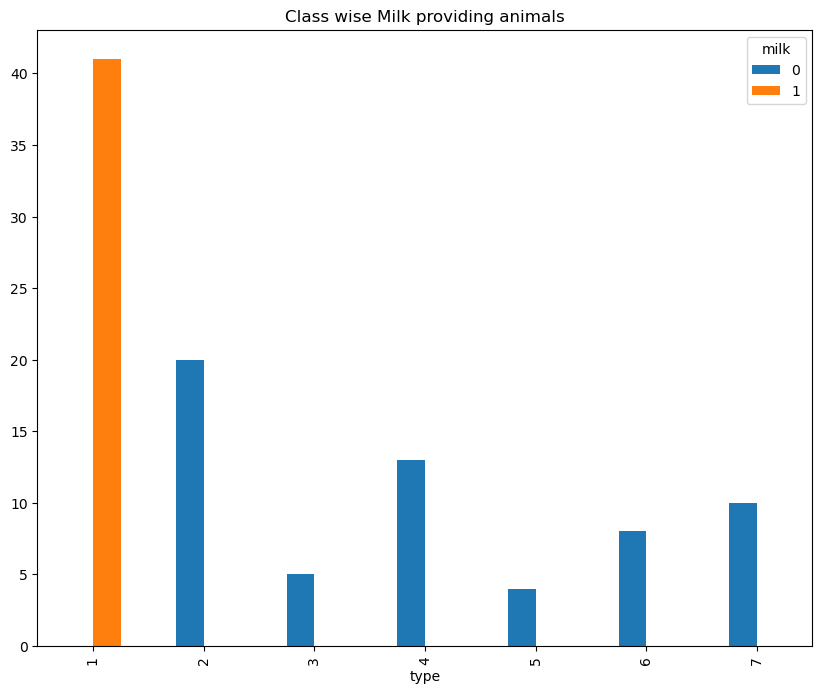

In [22]:
pd.crosstab(data['type'], data['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [23]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
data.aquatic.value_counts() # only 36 aquatic animals are there.
# lets see there class.

aquatic
0    65
1    36
Name: count, dtype: int64

In [24]:
data[data['aquatic']==1].type.value_counts()

type
4    13
7     6
1     6
2     6
5     4
3     1
Name: count, dtype: int64

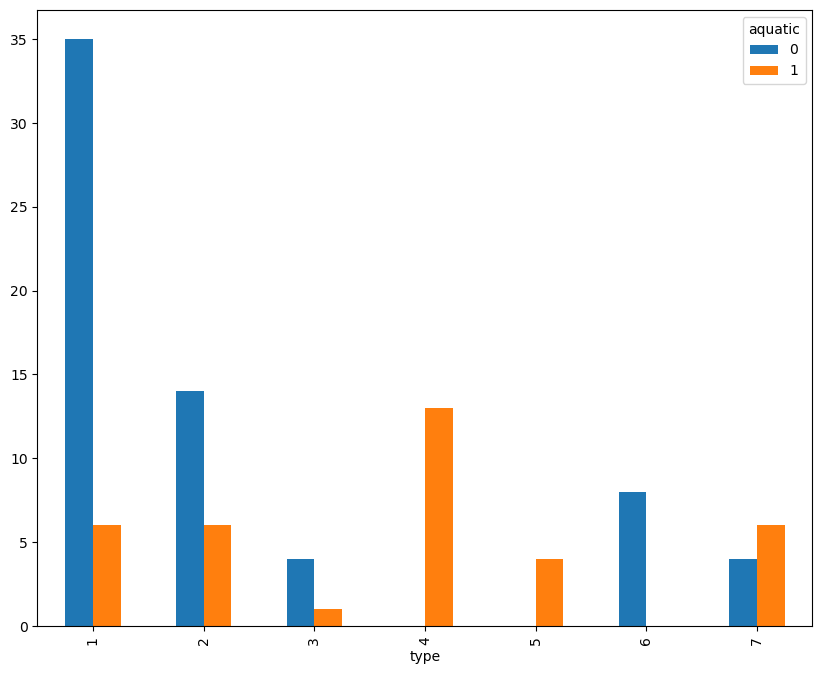

In [25]:
pd.crosstab(data['type'], data['aquatic']).plot(kind="bar", figsize=(10, 8));

In [26]:
# finding Unique value of class_type
type_list = [i for i in data.type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

In [31]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [32]:
# split train test data into 75/25.
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:16]
Y = data.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1, stratify=Y)

In [33]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
69,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
90,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
59,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
50,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0


In [34]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0
44,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
41,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0
32,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0
47,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
24,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0


In [35]:
Y_train

69    1
67    1
90    1
48    1
55    1
     ..
83    0
59    0
4     1
50    1
77    0
Name: catsize, Length: 75, dtype: int64

In [36]:
Y_test

71    1
97    0
44    1
60    1
17    1
41    0
32    1
47    1
24    0
16    0
13    0
95    1
72    0
0     1
12    0
56    1
7     0
30    0
27    0
14    0
21    0
63    1
80    0
2     0
15    0
5     1
Name: catsize, dtype: int64

In [37]:
num_folds = 10
kFold = KFold(n_splits=10)

In [38]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    19
1     7
Name: count, dtype: int64

In [40]:
pd.crosstab(Y_test, preds)

col_0,0,1
catsize,,
0,15,0
1,4,7


In [41]:
# Accuracy 
np.mean(preds==Y_test)

0.8461538461538461

In [42]:
model.score(X_train,Y_train)

0.8

In [43]:
print("Accuracy", accuracy_score(Y_test, preds)*100)

Accuracy 84.61538461538461


##### Use cross validation score since this is a small size dataset 
##### Get cross validation score of K-Nearest Neighbors

In [45]:
result = cross_val_score(model, X, Y, cv=kFold)

In [46]:
print(result.mean()*100)

76.27272727272728


In [47]:
print(result.std()*100)

12.704199865197182


##### Grid Search for Algorithm Tuning

In [48]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [49]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [50]:
print(grid.best_score_)
print(grid.best_params_)

0.790952380952381
{'n_neighbors': 5}


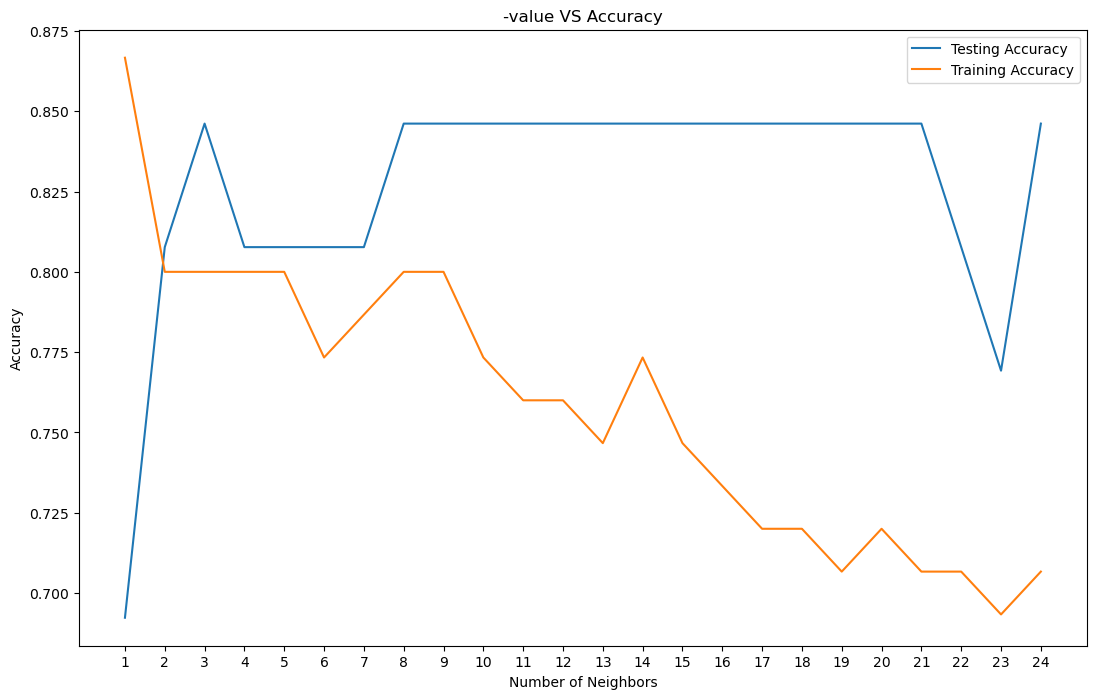

Best accuracy is 0.8461538461538461 with K = 3


In [51]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,Y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train,Y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test,Y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))